In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
import datetime as dt
# for geographic mapping
import cartopy # for geographic mapping
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [11]:
# conda install -n cartopy-dev ipykernel --update-deps --force-reinstall

In [12]:
import xarray as xr

ds = xr.open_mfdataset('..//WILDFIRE-DATA-ANALYSIS//data//*2019.nc')
print(ds)


<xarray.Dataset>
Dimensions:                          (time: 12, lat: 720, lon: 1440,
                                      vegetation_class: 18, bounds: 2)
Coordinates:
  * lat                              (lat) float64 89.88 89.62 ... -89.62 -89.88
  * lon                              (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * time                             (time) datetime64[ns] 2019-01-01 ... 201...
  * vegetation_class                 (vegetation_class) int32 -2147483647 ......
Dimensions without coordinates: bounds
Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta

In [13]:
##'burned_area', 'standard_error', 'fraction_of_burnable_area', 'fraction_of_observed_area','number_of_patches','burned_area_in_vegetation_class', 
## 'lat', 'lat_bounds', 'lon', 'time', 'time_bounds','vegetation_class_name'

In [14]:
ds.data_vars

Data variables:
    burned_area                      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    standard_error                   (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_burnable_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    fraction_of_observed_area        (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    number_of_patches                (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burned_area_in_vegetation_class  (time, vegetation_class, lat, lon) float32 dask.array<chunksize=(1, 18, 720, 1440), meta=np.ndarray>
    lat_bounds                       (time, lat, bounds) float64 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bounds                       (time, lon, bounds) float64 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    time_bounds                  

In [15]:
latbounds = [15.603,15.128]
lonbounds = [107.930,108.347]
lats = ds.burned_area["lat"][:]
lons = ds.burned_area["lon"][:]
lat_inds = np.where((lats > latbounds[0]) & (lats < latbounds[1]))
lon_inds = np.where((lons > lonbounds[0]) & (lons < lonbounds[1]))
total_bunred_area_vs_time  = ds.burned_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

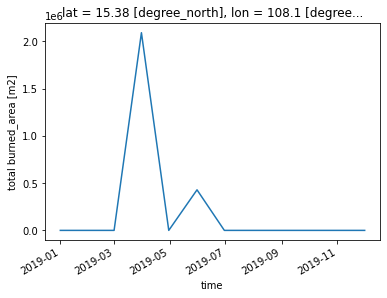

In [16]:
total_bunred_area_vs_time.plot()


In [17]:
ds.standard_error

<xarray.DataArray 'standard_error' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  standard error of the estimation of burned area
    units:      m2

In [18]:
standard_error_vs_time  = ds.standard_error.sel(lat=slice(*latbounds), lon=slice(*lonbounds))

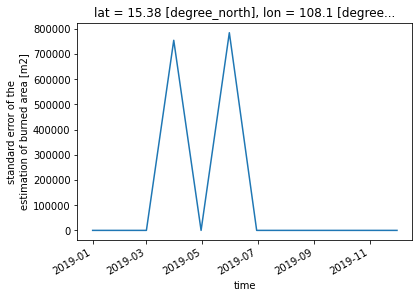

In [19]:

standard_error_vs_time.plot()

In [20]:
ds.fraction_of_burnable_area

<xarray.DataArray 'fraction_of_burnable_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of burnable area
    units:      1
    comment:    The fraction of burnable area is the fraction of the cell tha...

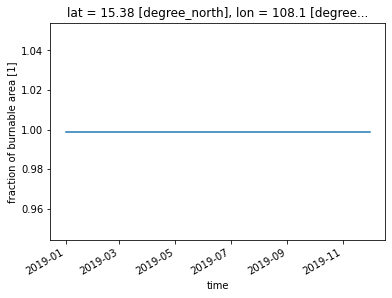

In [21]:
 fraction_of_burnable_area_vs_time =  ds.fraction_of_burnable_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
 fraction_of_burnable_area_vs_time.plot()

In [22]:
ds.fraction_of_observed_area 

<xarray.DataArray 'fraction_of_observed_area' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  fraction of observed area
    units:      1
    comment:    The fraction of the total burnable area in the cell (fraction...

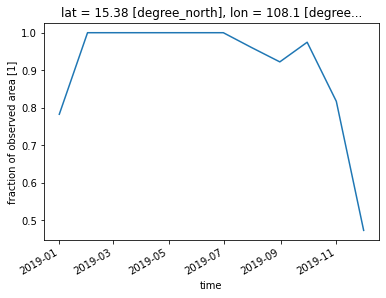

In [23]:
fraction_of_observed_area_vs_time =  ds.fraction_of_observed_area.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
fraction_of_observed_area_vs_time.plot()

In [24]:
ds.number_of_patches

<xarray.DataArray 'number_of_patches' (time: 12, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Attributes:
    long_name:  number of burn patches
    units:      1
    comment:    Number of contiguous groups of burned pixels.

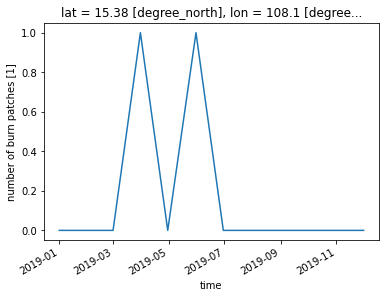

In [25]:
number_of_patches_vs_time =  ds.number_of_patches.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
number_of_patches_vs_time.plot()

In [26]:
ds.burned_area_in_vegetation_class

<xarray.DataArray 'burned_area_in_vegetation_class' (time: 12,
                                                     vegetation_class: 18,
                                                     lat: 720, lon: 1440)>
dask.array<concatenate, shape=(12, 18, 720, 1440), dtype=float32, chunksize=(1, 18, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat               (lat) float64 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * lon               (lon) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time              (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
  * vegetation_class  (vegetation_class) int32 -2147483647 ... -2147483647
Attributes:
    units:         m2
    long_name:     burned area in vegetation class
    cell_methods:  time: sum
    comment:       Burned area by land cover classes; land cover classes are ...

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xarray\plot\plot.py:1482: UserWarning: Attempting to set identical left == right == -2147483647.0 results in singular transformations; automatically expanding.
  ax.set_xlim(x[0], x[-1])


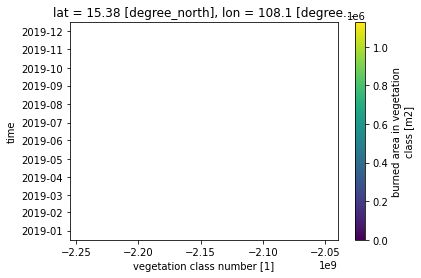

In [27]:
burned_area_in_vegetation_class_vs_time =  ds.burned_area_in_vegetation_class.sel(lat=slice(*latbounds), lon=slice(*lonbounds))
burned_area_in_vegetation_class_vs_time.plot()

In [32]:
ax = plt.axes(projection=crs.PlateCarree())
ax.burned_area_in_vegetation_class_vs_time()

plt.show()

NameError: name 'crs' is not defined

In [ ]:
ds.vegetation_class_name